<a href="https://colab.research.google.com/github/trevisanwjr/Projetos_Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)

**Prepared by:** Walter Trevisan Jr

---


# Análise dos Dados do Airbnb - **Barcelona - Capital da Espanha** 


**Principais características da cidade:**

    - Possui uma população de cerca de 4,7 milhões de pessoas.
    - É um dos principais centros turísticos, econômicos, comerciais e culturais do mundo.

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, apenas como detalhe, o site **não possui nenhum hotel**!

![Online Experiences](https://a0.muscache.com/im/pictures/39338372-3b65-41da-940b-b81ce003f749.jpg?im_w=480)

*Figura-1: imóvel alugado em Barcelona*

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar e questionar os dados do Airbnb, referentes à cidade BARCELONA, e, com base nos insights, extrair informações e realizar constatações.**

### **Obtenção dos Dados**

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](https:/http://insideairbnb.com/get-the-data.html/)

Para esta análise exploratória inicial utilizaremos apenas o seguinte arquivo:


*  listings.csv - *Summary information and metrics for listings in Barcelona (good for visualisations).*

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-05-11/visualisations/listings.csv")

### **Análise dos Dados**

A estapa de análise dos dados tem como objetivo principal, situar o leitor sobre a estrutura do dados, disposição e metadados disponíveis.


Depois desta breve análise dos dados, se faz necessário entender o seu conteúdo e, uma das formas mais simples de se fazer isso, é utilizando o **dicionário das variáveis**, conforme mostrado abaixo:

**Dicionário das variáveis**

* id - número de id gerado automaticamente pelo sistema, para identicar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário da propriedade
* neighbourhood_group - sem valor válido
* neighbourhood - nome do bairro
* latitude - coordenada de latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para aligar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* avalilability_365 - número de dias da disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [21]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38077,2.17551,Private room,60,3,2,2017-11-06,0.05,3,90
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,345
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,58,1,188,2020-03-09,1.67,29,337
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,66,1,94,2020-03-07,0.83,29,331
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.59,6,329


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Entender os atributos e conhecer o conjunto de dados e tipos de variáveis, faz parte da análise.

Este *dataset* que utilizamos é um dos tipos de base de dados que o Airbnb disponibiliza livremente, e que apresenta os dados de forma *resumida*

Obs: para quem tiver curiosidade há uma versão mais completa com diversas outras entradas e variáveis (*listings.csv.gz*)


In [22]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Metadados:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20858
Metadados:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Conhecer e considerar os dados "faltantes" no seu *dataset*, é muito importante para o resultado final e, permite medir a quantidade de esforço necessário possíveis ajustes e correções (ETL extract, transform, load)


In [23]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)


reviews_per_month                 0.256352
last_review                       0.256352
name                              0.000719
host_name                         0.000288
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

##### **Após a análise do nosso *dataset*, podemos concluir que nenhum *metadado*, poussui 100% dos seus valores faltantes.**

* Os *metadados* que possuem as maiores quantidade de itens faltantes são
**last_review** e ***reviews_per_month***, com cerca de 25%;
* O ***name*** e o ***host_name*** possuem respectivamente 0,07% e 0,02% de valores nulos ou faltantes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

* O gráfico de distribuição, é uma das formas de apresentação mais usadas entre os profissionais de análise e ciência de dados.  
Abaixo, apresentamos os gráficos de distribuição:

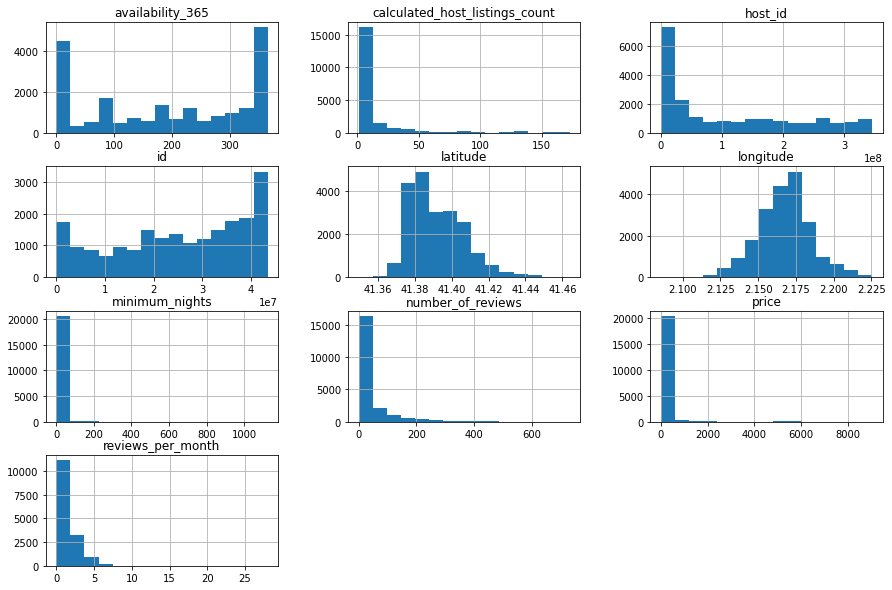

In [24]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


###**Q4. Há outliers presentes?**

Os *outliers* são valores totalmente discrepantes dos demais, e que geram erros e desvios nos cálculos estatísticos (*média, desvio padrão, etc*)

A análise dos histogramas, já nos permite verificar essas discrepâncias. 


In [25]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20858.000000,20858.000000,20858.000000,15511.000000,20858.000000,20858.000000
mean,124.210711,9.916051,34.655336,1.369111,14.880142,193.537540
std,405.947246,20.589782,64.189641,1.439218,31.028560,137.941732
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,36.000000,1.000000,0.000000,0.290000,1.000000,69.000000
50%,59.000000,2.000000,6.000000,0.870000,3.000000,203.000000
75%,100.000000,6.000000,39.000000,2.070000,11.000000,339.000000
max,9034.000000,1124.000000,731.000000,27.980000,173.000000,365.000000


#####***Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:***

* A variável price possui 75% do valor abaixo de 100, porém seu valor máximo é 9034.
* A quantidade mínima de noites (minimum_nights) é de 1124 dias no ano, o que é impossível!

#####**Boxplot para minimum_nights**

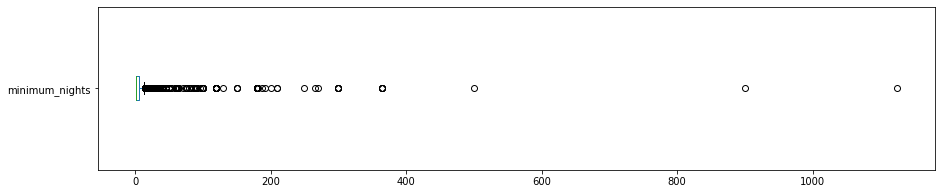

minimum_nights: valores acima de 30:
3581 entradas
17.1685%


In [28]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#####**Boxplot para price**

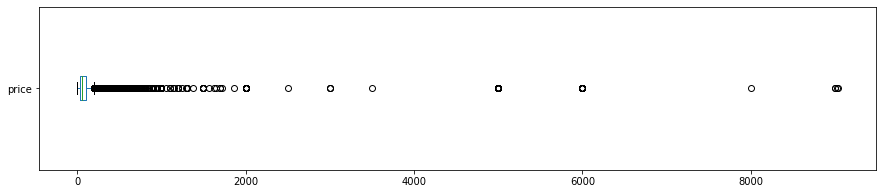

In [52]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#####*Analisar a coluna price*, considerando os valores acima de U$ 1500

In [53]:
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


price: valores acima de 1500
130 entradas
0.6233%


#####**Constatação**: pelo resultado, podemos verificar que temos 130 alugueis acima de U$ 1500, representando 62,33% do total.*

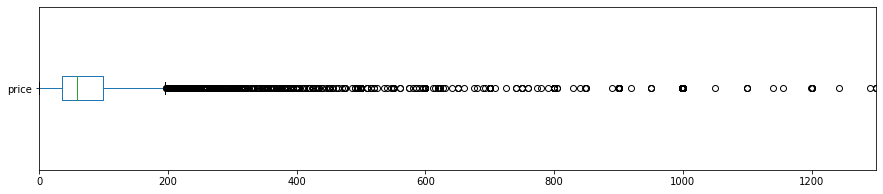

In [56]:
df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#####**Histogramas sem *outliers***
Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente os histogramas.

Vejamos abaixo: 

#####**Remover os *outliers* em um novo DataFrame**

In [0]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


####**Não existe nenhum *metadado* vazio!**

######*Caso existisse, bastaria executar o código abaixo, substituindo o nome do metadado.*

In [0]:
#df_clean.drop('metadado', axis=1, inplace=True)

####**Plotar o histograma para as variáveis numéricas**

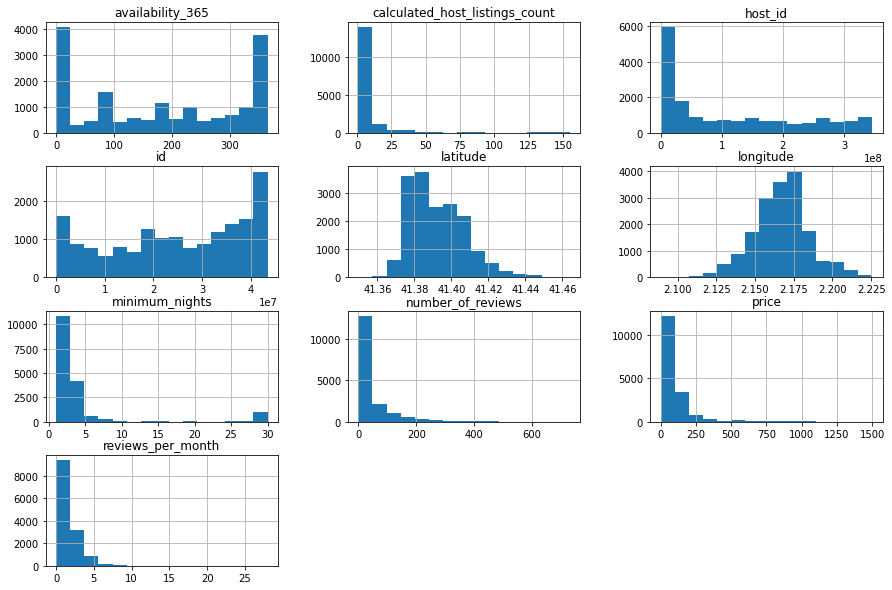

In [33]:
df_clean.hist(bins=15, figsize=(15,10));

###**Q5. Qual a média dos preços de aluguel?**

In [59]:
# ver a média da coluna `price``
my_numbers = []

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)


reviews_per_month                 0.256352
last_review                       0.256352
name                              0.000719
host_name                         0.000288
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q6. Qual a correlação existente entre as variáveis**

Correlacionar alguma coisa, significa medir a relação entre elas. Diante do nosso contexto, estamos buscando mostrar a relação entre duas variáveis.

No nosso caso, essa relação pode ser medida em função de um coeficiente de correlação, que irá nos dizer a intensidade entre eles. 

Para identificar as correlações existentes entre as variáveis de interesse, vamos construir uma **matriz de correlação** e um heatmap (mapa de calor), utilizando especificamente a biblioteca *seaborn*



In [34]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()

print(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.066339,-0.030853,-0.039553,0.130505,0.198310
minimum_nights,-0.066339,1.000000,-0.120136,-0.145199,-0.034301,0.069378
number_of_reviews,-0.030853,-0.120136,1.000000,0.696890,-0.089427,0.128951
reviews_per_month,-0.039553,-0.145199,0.696890,1.000000,-0.117209,0.067440
calculated_host_listings_count,0.130505,-0.034301,-0.089427,-0.117209,1.000000,0.248550
availability_365,0.198310,0.069378,0.128951,0.067440,0.248550,1.000000


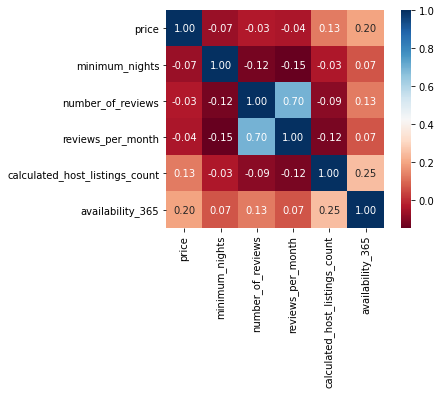

In [41]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. 

Se você já alugou no site, sabe que existe as opções de locação de apartamentos e casas inteiras ou apenas o aluguel de um quarto, ou ainda mesmo dividir o quarto com outras pessoas.

Agora vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [42]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       9869
Entire home/apt    6664
Hotel room          402
Shared room         235
Name: room_type, dtype: int64

In [43]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Private room       0.574782
Entire home/apt    0.388119
Hotel room         0.023413
Shared room        0.013687
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de BARCELONA?**

Uma maneira de se verificar isso, é analisar uma variável em função da outra usando o *groupby()*. Neste caso, vamos analisar os bairros (neighbourhoods) a partir do preço da locação.

Vejamos abaixo:


In [44]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Diagonal Mar i el Front Marítim del Poblenou    226.768750
Vallcarca i els Penitents                       201.115385
la Vila Olímpica del Poblenou                   183.549451
la Dreta de l'Eixample                          176.719621
Vallvidrera, el Tibidabo i les Planes           163.333333
la Marina del Prat Vermell                      147.666667
Pedralbes                                       126.650000
la Vila de Gràcia                               122.287596
el Poblenou                                     121.190361
les Tres Torres                                 119.678571
Name: price, dtype: float64

Acima, podemos ver que o bairro de ***Diagonal Mar i el Front Marítim del Poblenou*** está com uma média de preços superior aos demais.

Segundo o [wikipédia](https://www.google.com/search?q=Diagonal+Mar+i+el+Front+Mar%C3%ADtim+del+Poblenou&rlz=1C1OKWM_pt-BRBR866BR866&oq=Diagonal+Mar+i+el+Front+Mar%C3%ADtim+del+Poblenou&aqs=chrome..69i57j46j0l4.831j0j7&sourceid=chrome&ie=UTF-8), *Diagonal Mar* é um dos bairros mais novos da cidade *Condal* e foi desenhado e criado por plano urbanístico que se realizou para a celebração do Fórum Universal de les Cultures de Barcelona, em 2004.

In [46]:
# ver quantidade de imóveis no Diagonal Mar i el Front Marítim del Poblenou
print(df_clean[df_clean.neighbourhood == "Diagonal Mar i el Front Marítim del Poblenou"].shape)


(160, 15)


In [49]:
# ver as 160 entradas do bairro Diagonal Mar i el Front Marítim del Poblenou
df_clean[df_clean.neighbourhood == "Diagonal Mar i el Front Marítim del Poblenou"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
53,130227,Spacious Room with Pool and Terrace,641496,Dolors,Diagonal Mar i el Front Marítim del Poblenou,41.40646,2.21282,Private room,42,1,104,2019-12-02,1.41,1,354
83,198958,STUNNING sea view + pool Barcelona!,971768,Akira,Diagonal Mar i el Front Marítim del Poblenou,41.40854,2.21368,Entire home/apt,190,1,60,2019-11-19,0.61,16,216
348,619775,Modern and functional apartment near the beach,1683936,Ghat,Diagonal Mar i el Front Marítim del Poblenou,41.40246,2.21069,Entire home/apt,90,2,23,2020-02-16,0.26,13,341
538,839805,MEDITERRANEAN TERRACE,4386966,Carmen,Diagonal Mar i el Front Marítim del Poblenou,41.40383,2.21430,Entire home/apt,500,3,3,2018-08-22,0.04,2,0
733,1026452,Barcelona Beach Flat with Parking,5650710,Alicia,Diagonal Mar i el Front Marítim del Poblenou,41.40156,2.21036,Entire home/apt,123,4,33,2020-01-01,0.47,2,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19516,42410069,Comfort Double Room Beach,337522581,Gabi,Diagonal Mar i el Front Marítim del Poblenou,41.40939,2.21682,Private room,21,1,2,2020-03-22,0.78,2,175
19629,42527444,Habitación con vistas al mar,207873452,Yami Y Marvin,Diagonal Mar i el Front Marítim del Poblenou,41.40779,2.20665,Private room,35,1,1,2020-03-11,0.48,3,91
19637,42536918,New Cozy pool apartment next to the beaches,1432835,Angel,Diagonal Mar i el Front Marítim del Poblenou,41.40399,2.21144,Entire home/apt,100,3,0,NaN,NaN,38,265
19907,42733381,"SEA BREEZE, first coastline, near the center.",224601175,Виктор,Diagonal Mar i el Front Marítim del Poblenou,41.40476,2.21370,Private room,29,3,1,2020-03-11,0.48,1,27


Ainda podemos ver na tabela acima, que o Dataset, informa a latítude e a longitude dos imóveis. Com essas informações, é possível lotar cada ponto em assim verificar concentrações.

Vamos considerar: X = Longitude e Y = Latitude

Vejamos abaixo:

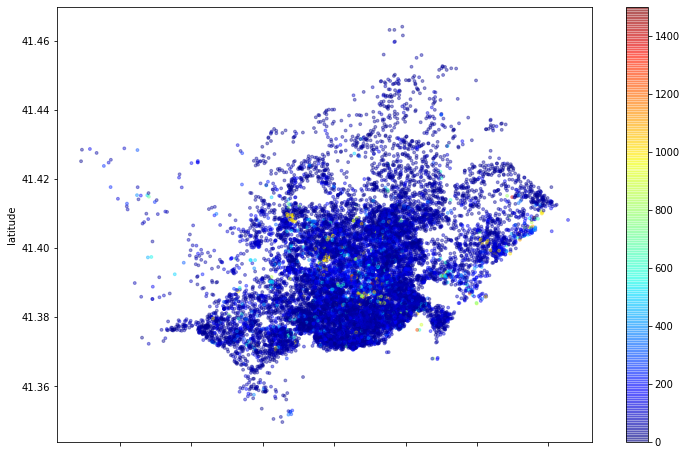

In [51]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [64]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(['minimum_nights']).price.mean().sort_values(ascending=False)[:5]

minimum_nights
14    202.452830
18    170.250000
8     146.500000
27    124.500000
6     117.862385
Name: price, dtype: float64

### **Conclusões**


##### À analise aqui realizada foi superficial e com um *dataset* limitado, porém já conseguimos perceber que existem *outliers* em algumas das variáveis, também denominadas de *metadados*.

##### Entre outros, percebe-se que existem algumas localidades onde a disponibilidade de imóveis é mais dificil, ou seja, existem pouca disponibilidade, o que, pode distorcer algumas das informações estatísticas.

##### Por fim, lembramos que este dataset é uma versão muito resumida, e que tem por referência ser uma abordagem inicial e superficial. 

##### Recomendamos que quando se tratar de uma análise exploratória, deve-se utilizar o conjunto de dados em sua totalidade, com todos os 106 atributos disponíveis.

### **Referências:**